# Quantum measurement

When a measurement of the state $|\psi\rangle$ is made in the computational basis, the result $|0\rangle$ is obtained with the probabilitiy $|\langle 0 | \psi \rangle|^2$ and $|1\rangle$ with probability $|\langle 1 | \psi \rangle|^2$. This is known as the Borne rule.

In [11]:
from qiskit import execute, QuantumCircuit, Aer
from qiskit.visualization import plot_bloch_multivector, array_to_latex, plot_histogram
from numpy import pi

sv_sim = Aer.get_backend("statevector_simulator")
stoch_sim = Aer.get_backend("qasm_simulator")

def display_sv(qc):
    sv = execute(qc, sv_sim).result().get_statevector()
    return plot_bloch_multivector(sv)

Consider the state
$$
| \psi \rangle = \cos \frac{\pi}{6} |0\rangle + \sin \frac{\pi}{6} |1\rangle = \frac{\sqrt{3}}{2}|0\rangle + \frac{1}{2}|1\rangle
$$

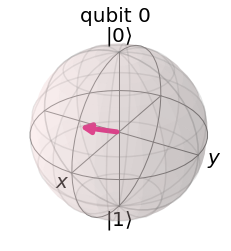

In [14]:
qc = QuantumCircuit(1,1)
qc.ry(pi/3,0)
display_sv(qc)

A result called the Holevo bound establishes that one can only obtain one bit of information as the result of a single quantum measurement. This is demonstrated in the next cell. Run it multiple times and look at the result:

In [48]:
qc.measure(0,0)
counts = execute(qc, stoch_sim, shots = 1).result().get_counts()
result, = counts.keys()
print(result)

1


Due to the Borne rule, if we average the result over a large number of shots, we should see the predicted statistics for the measurement.
$$
|\langle 0 | \psi \rangle |^2 = \left|\frac{\sqrt{3}}{2}\right|^2 = \frac{3}{4}
$$
$$
|\langle 1 | \psi \rangle |^2 = \left|\frac{1}{2}\right|^2 = \frac{1}{4} 
$$
These probabilities are correctly normalized due to the fact that that state is normalized. Let's see if they agree with the simulation:

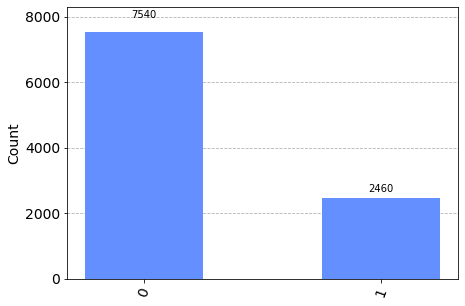

In [49]:
qc.measure(0,0)
counts = execute(qc, stoch_sim, shots = 10000).result().get_counts()
plot_histogram(counts)

In [53]:
print("Zero measured: %f"%(counts['0']/sum(counts.values())))
print("One measured: %f"%(counts['1']/sum(counts.values())))

Zero measured: 0.754000
One measured: 0.246000
